In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 88 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 7.6 MB/s 
     |████████████████████████████████| 18.2 MB 585 kB/s 
     |████████████████████████████████| 76 kB 6.3 MB/s 
     |████████████████████████████████| 837 kB 46.7 MB/s 
     |████████████████████████████████| 136 kB 40.0 MB/s 
     |████████████████████████████████| 830 kB 48.8 MB/s 
     |████████████████████████████████| 822 kB 47.2 MB/s 
     |████████████████████████████████| 802 kB 48.2 MB/s 
     |████████████████████████████████| 802 kB 63.3 MB/s 
     |████████████████████████████████| 793 kB 48.3 MB/s 
     |████████████████████████████████| 793 kB 10.2 MB/s 
     |████████████████████████████████| 791 kB 11.6 MB/s 
     |████████████████████████████████| 786 kB 19.9 MB/s 
     |████████████████████████████████| 779 kB 47.4 MB/s 
     |████████████████████████████████| 778 kB 43.5 MB/s 
     |████████████████████████████████| 776 kB 44.1 MB/s 
     |█████████████

In [ ]:
!pip install imbalanced-learn

In [1]:
# Importation des différentes librairies utiles pour le notebook
#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pathlib
from google.colab import drive
import PIL
import PIL.Image


In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_dir = "gdrive/My Drive/dataClean/train"
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
print(data_dir)

2039
gdrive/My Drive/dataClean/train


In [5]:
abeilles = list(data_dir.glob('abeille/*'))
alveoles = list(data_dir.glob('alveole/*'))
print(len(abeilles),len(alveoles))

1196 843


In [ ]:
PIL.Image.open(str(abeilles[0]))

In [6]:
batch_size = 32
img_height = 24
img_width = 25


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  color_mode = "grayscale",
  batch_size=batch_size)

Found 2039 files belonging to 2 classes.
Using 1632 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  color_mode = "grayscale",
  batch_size=batch_size)

Found 2039 files belonging to 2 classes.
Using 407 files for validation.


In [9]:
class_names = train_ds.class_names


(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)
(32, 24, 25, 1)


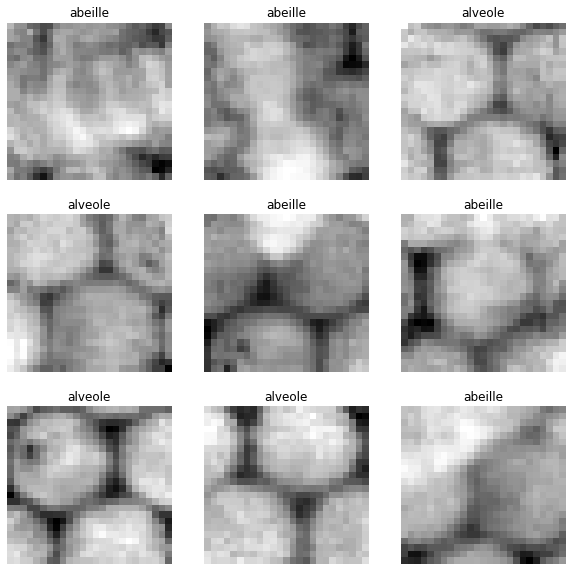

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images.shape)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(),cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
seed=7
nb_splits=15
k_fold = KFold(n_splits=nb_splits, shuffle=True, random_state=seed)
pipe = Pipeline([('pca',PCA(n_components=200)),
                 ('clf',GaussianNB())])

In [11]:
unb_train_ds = train_ds.unbatch()
train_X = list(unb_train_ds.map(lambda x, y: x))
train_Y = list(unb_train_ds.map(lambda x, y: y))

KeyboardInterrupt: ignored

In [ ]:
scoring = 'accuracy'
print(train_Y[0])
train_images = np.array(train_X)
train_labels = np.array(train_Y)

tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
train_images_reshaped = train_images.reshape((train_images.shape[0], 25 * 24))

In [ ]:
print ("Evaluation de ",pipe["clf"], " sur ", nb_splits, " splits")
score = cross_val_score(pipe, train_images_reshaped, train_labels,cv=k_fold, scoring=scoring)

Evaluation de  GaussianNB()  sur  15  splits


In [ ]:
print('Les différentes accuracy pour les ",nb_splits, " évaluations sont : \n', score,'\n')
print ('Accuracy moyenne : %0.3f'%(score.mean()),
       ' standard deviation %0.3f'%(score.std()))

Les différentes accuracy pour les ",nb_splits, " évaluations sont : 
 [0.4587156  0.55045872 0.49541284 0.46788991 0.56880734 0.55045872
 0.55963303 0.5412844  0.58715596 0.50458716 0.44036697 0.56880734
 0.57407407 0.52777778 0.46296296] 

Accuracy moyenne : 0.524  standard deviation 0.047


In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.47943634 0.95750004


In [13]:
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4), #ici
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
unb_train_ds = train_ds.unbatch()
train_X = list(unb_train_ds.map(lambda x, y: x))
train_Y = list(unb_train_ds.map(lambda x, y: y))
kfold = KFold(n_splits=3, shuffle=True, random_state=2019) 
#results = cross_val_score(model, train_X, train_Y, cv=kfold)

In [16]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  #validation_steps = /batch_size,
  epochs=25 # Epoch max 12 
)

Epoch 1/25
51/51 [==============================] - 16s 287ms/step - loss: 0.7108 - accuracy: 0.5423 - val_loss: 0.6805 - val_accuracy: 0.6265
Epoch 2/25
51/51 [==============================] - 3s 54ms/step - loss: 0.6616 - accuracy: 0.6189 - val_loss: 0.6088 - val_accuracy: 0.6609
Epoch 3/25
51/51 [==============================] - 3s 54ms/step - loss: 0.5392 - accuracy: 0.7371 - val_loss: 0.4484 - val_accuracy: 0.8010
Epoch 4/25
51/51 [==============================] - 3s 54ms/step - loss: 0.4151 - accuracy: 0.8217 - val_loss: 0.4143 - val_accuracy: 0.8010
Epoch 5/25
51/51 [==============================] - 3s 56ms/step - loss: 0.3932 - accuracy: 0.8199 - val_loss: 0.4156 - val_accuracy: 0.8059
Epoch 6/25
51/51 [==============================] - 3s 55ms/step - loss: 0.3933 - accuracy: 0.8272 - val_loss: 0.4474 - val_accuracy: 0.7985
Epoch 7/25
51/51 [==============================] - 3s 56ms/step - loss: 0.3788 - accuracy: 0.8352 - val_loss: 0.4102 - val_accuracy: 0.8108
Epoch 8/25


In [ ]:
test_dir = "gdrive/My Drive/dataClean/test"
test_dir = pathlib.Path(test_dir)
print(test_dir)
print(list(test_dir.glob("*")))

gdrive/My Drive/dataClean/test
[PosixPath('gdrive/My Drive/dataClean/test/alveole'), PosixPath('gdrive/My Drive/dataClean/test/abeille')]


In [ ]:
imageTest_count = len(list(test_dir.glob('*/*.png')))
print(imageTest_count)
print(data_dir)


552
gdrive/My Drive/dataClean/train


In [ ]:
train_test = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  color_mode = "grayscale",
  batch_size=batch_size)

Found 552 files belonging to 2 classes.
Using 442 files for training.


In [ ]:
val_test = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  color_mode = "grayscale",
  batch_size=batch_size)

Found 552 files belonging to 2 classes.
Using 110 files for validation.


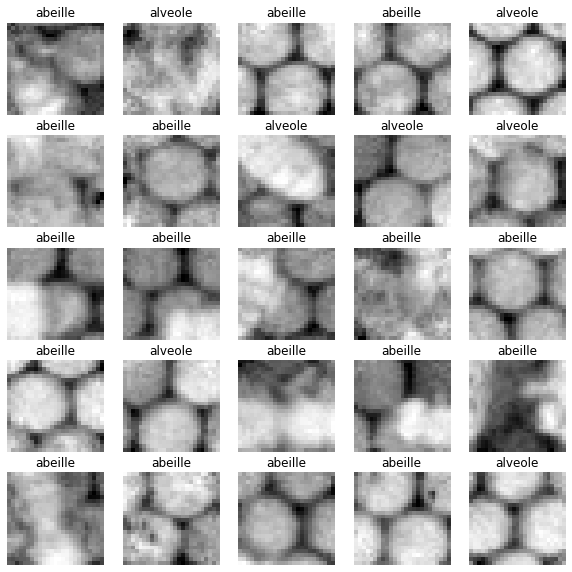

In [ ]:
predict_y = model.predict(val_test)
y_pred=np.argmax(predict_y,axis=1)
plt.figure(figsize=(10, 10))
for images,y in val_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(),cmap=plt.cm.binary)
    plt.title(class_names[y_pred[i]])
    plt.axis("off")

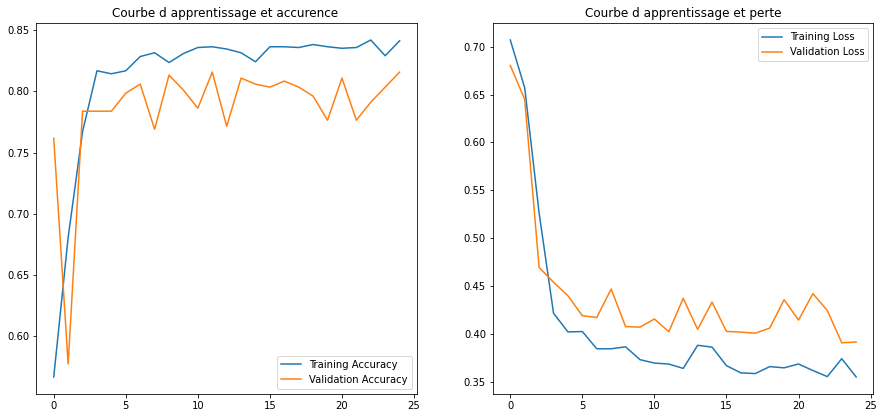

In [ ]:
lacc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, lacc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Courbe d apprentissage et accurence ')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Courbe d apprentissage et perte')
plt.show()

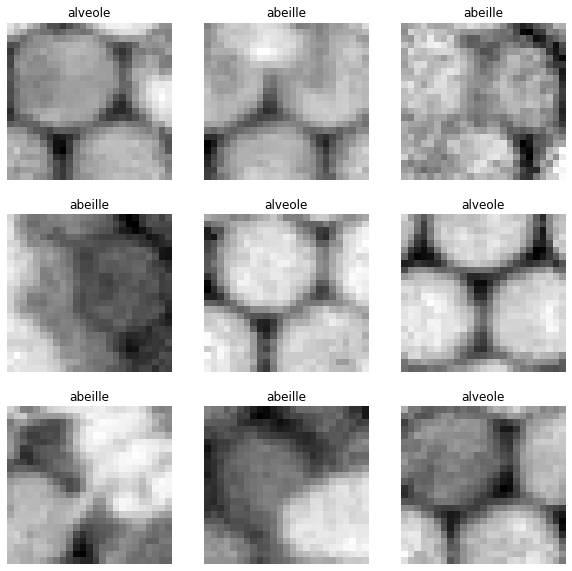

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(),cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
unb_val_t = val_test.unbatch()
val_test_labales = list(unb_val_t.map(lambda x, y: y))

In [ ]:
print("Accuracy sur le jeu de test :",accuracy_score(val_test_labales,y_pred))

Accuracy sur le jeu de test : 0.5
